In [174]:
import pandas as pd
data = pd.read_csv("credit_card.csv")

Inspect the dataset

In [175]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:18:07,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,...,35.8072,-78.0892,6629,Call centre manager,1962-08-13,abe0676c18f34fa305b113fa762e29b5,1325377087,36.749870,-78.677870,0
2,2019-01-01 00:37:18,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,...,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,289789e617eece42a9cafe36680b1b69,1325378238,35.034285,-92.343010,0
3,2019-01-01 00:56:59,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,...,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,9d660a18154a3ba5fe869f373c6f819c,1325379419,42.868965,-108.503350,0
4,2019-01-01 01:16:52,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,...,26.7383,-80.2760,26551,Paramedic,1977-01-04,3c6158c556727d527f8b51cc03b30236,1325380612,27.346033,-80.475563,0


Check for nulls

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59073 entries, 0 to 59072
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  59073 non-null  object 
 1   cc_num                 59073 non-null  int64  
 2   merchant               59073 non-null  object 
 3   category               59073 non-null  object 
 4   amt                    59073 non-null  float64
 5   first                  59073 non-null  object 
 6   last                   59073 non-null  object 
 7   gender                 59073 non-null  object 
 8   street                 59073 non-null  object 
 9   city                   59073 non-null  object 
 10  state                  59073 non-null  object 
 11  zip                    59073 non-null  int64  
 12  lat                    59073 non-null  float64
 13  long                   59073 non-null  float64
 14  city_pop               59073 non-null  int64  
 15  jo

Calculating fraudulent transaction mean and median

In [177]:
fraud_amt_avg = data[data["is_fraud"] == 1]["amt"].mean()
fraud_amt_median = data[data["is_fraud"] == 1]["amt"].median()
print(f"fraudulent transaction mean amount is {fraud_amt_avg} and median is {fraud_amt_median}")

fraudulent transaction mean amount is 531.3200919264589 and median is 396.505


Calculating total fraud and non-fraud for credit number 344709867813900

In [178]:
cc_344709867813900 = data[data["cc_num"] == 344709867813900].groupby("is_fraud")["amt"].sum()
cc_344709867813900

is_fraud
0    11667.49
1     6450.28
Name: amt, dtype: float64

Drop columns unix_time and trans_num

In [179]:
data = data.drop(["unix_time", "trans_num"], axis=1)
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:18:07,343464013864032,fraud_Kunde-Sanford,misc_net,2.55,Jodi,Foster,F,551 Zachary Freeway,Bailey,NC,27807,35.8072,-78.0892,6629,Call centre manager,1962-08-13,36.749870,-78.677870,0
2,2019-01-01 00:37:18,4265776278887457,fraud_Pacocha-O'Reilly,grocery_pos,103.00,Christine,Best,F,68248 Deanna Land,Enola,AR,72047,35.2087,-92.2123,969,"Physicist, medical",1954-01-05,35.034285,-92.343010,0
3,2019-01-01 00:56:59,571465035400,"fraud_Reichert, Huels and Hoppe",shopping_net,113.40,Louis,Fisher,M,45654 Hess Rest,Fort Washakie,WY,82514,43.0048,-108.8964,1645,Freight forwarder,1976-02-26,42.868965,-108.503350,0
4,2019-01-01 01:16:52,6593250708747804,fraud_Brekke and Sons,gas_transport,55.18,Melissa,Meza,F,244 Abbott Parkway,Loxahatchee,FL,33470,26.7383,-80.2760,26551,Paramedic,1977-01-04,27.346033,-80.475563,0


Adding an additional column that categorises time of day when the transaction took place

In [180]:
from datetime import time

In [181]:
#define function for time of day
def timeofday(t):
    if time(0, 0, 0) <= t <= time(5, 59, 59):
        return 1
    elif time(6, 0, 0) <= t <= time(11, 59, 59):
        return 2
    elif time(12, 0, 0) <= t <= time(17, 59, 59):
        return 3
    else:
        return 4
#apply above function to time extracted from "trans_date_trans_time" in datetime format
data["time_of_day"] = pd.to_datetime(data["trans_date_trans_time"]).dt.time.apply(timeofday)
data.sample(5)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,time_of_day
54181,2019-06-29 18:09:06,3519232971341141,fraud_Eichmann-Russel,misc_pos,50.28,Michael,Jones,M,754 Smith Isle,Amsterdam,...,43903,40.4731,-80.9596,2208,Mental health nurse,1961-09-10,41.273864,-80.482311,1,4
10808,2019-05-14 15:29:02,4092452671396169678,fraud_Schmeler-Howe,personal_care,67.15,Jeffrey,Vargas,M,478 Alexandria Mount,Bolton,...,28423,34.3091,-78.3372,2290,"Engineer, biomedical",1945-12-07,35.069623,-78.504683,0,3
57210,2020-02-08 00:15:45,2713913904780408,fraud_Kilback LLC,grocery_pos,298.98,Jacqueline,Howard,F,4511 Choi Lock,Delhi,...,71232,32.3929,-91.4714,6581,Multimedia programmer,1964-02-13,32.783531,-91.465294,1,1
45686,2020-04-23 23:37:04,341542810616333,fraud_Schumm PLC,health_fitness,58.96,Billy,Mcdonald,M,304 Ryan Port Suite 335,Camden,...,64017,39.2048,-94.0259,464,Colour technologist,1959-05-28,39.730034,-94.190614,0,4
28347,2019-10-31 19:07:52,4742883543039288059,fraud_Dibbert-Green,entertainment,191.38,Cassandra,Sanders,F,78117 George Mountains,Paauilo,...,96776,20.0271,-155.3697,1490,"Scientist, research (maths)",1991-04-13,19.838804,-154.470648,0,4


Now to remove trans_time from trans_date_trans_time

In [182]:
data["trans_date_trans_time"] = data["trans_date_trans_time"].str.split(" ").str.get(0)
data.sample(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,time_of_day
39706,2020-02-13,4646845581490336108,fraud_Jaskolski-Dibbert,grocery_net,113.23,Julia,Bell,F,576 House Crossroad,West Sayville,...,11796,40.7320,-73.1000,4056,Film/video editor,1990-06-25,40.794204,-72.621574,0,2
13617,2019-06-10,4128027264554082,fraud_Schoen Ltd,kids_pets,80.91,Kyle,Park,M,7507 Larry Passage Suite 859,Mount Perry,...,43760,39.8788,-82.1880,1831,Barrister's clerk,1953-10-18,39.552622,-82.496080,0,3
9764,2019-05-03,30518206766474,"fraud_Hettinger, McCullough and Fay",home,113.24,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,...,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,36.069318,-88.965320,0,3
4880,2019-03-10,4957924165498,"fraud_Zboncak, Rowe and Murazik",shopping_net,24.54,Alan,Parsons,M,0547 Russell Ford Suite 574,Kirk,...,80824,39.6171,-102.4776,207,Network engineer,1955-12-04,38.677817,-102.780522,0,1
11277,2019-05-20,3573030041201292,"fraud_Lockman, West and Runte",grocery_pos,83.13,Joanne,Williams,F,3638 Marsh Union,Altonah,...,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,40.670338,-111.201802,0,1


In [183]:
data["time_of_day"].value_counts()

time_of_day
4    19819
3    16133
1    12714
2    10407
Name: count, dtype: int64

In [184]:
import matplotlib as plt
import seaborn as sns

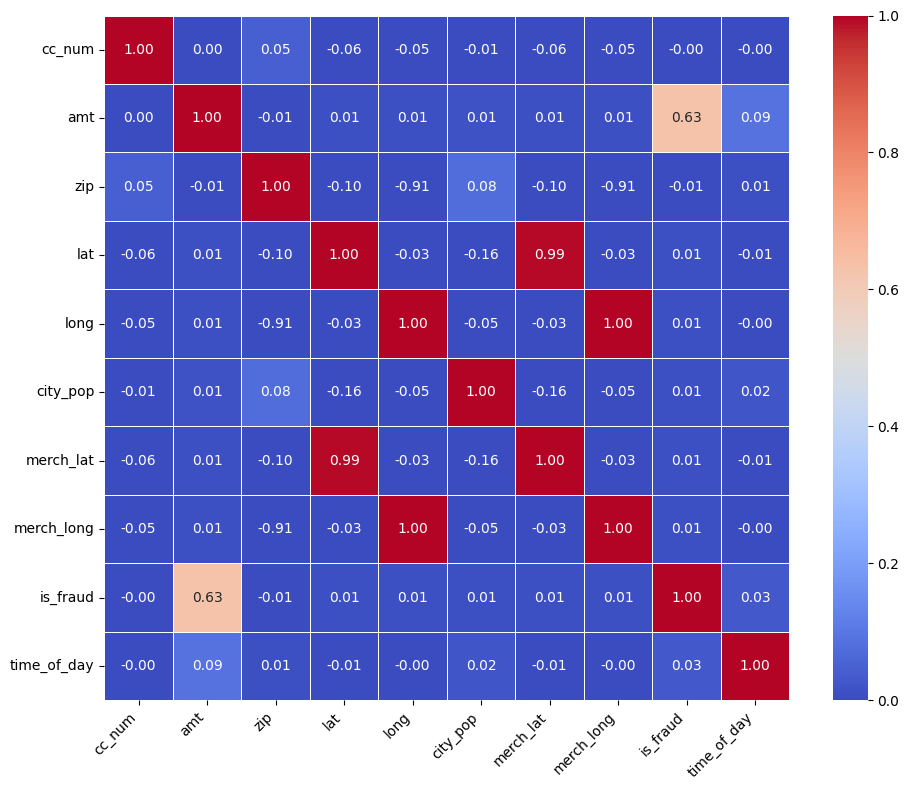

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr(method="pearson", numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap='coolwarm', square=True, vmin=0,vmax=1)

# Improve the visibility of the heatmap
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [186]:
from sklearn.preprocessing import LabelEncoder

#Create encoder
le = LabelEncoder()

#Get the categorical features with Pandas
categorical_features = data.select_dtypes(include=['object']).columns

In [187]:
categorical_features

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob'],
      dtype='object')

Encode categorical data for machine learning

In [188]:
data_encoded = data.copy()

#Create encoded category data columns
data_encoded[categorical_features] = data_encoded[categorical_features].apply(le.fit_transform)

data_encoded.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,time_of_day
0,0,2703186189652095,514,8,4.97,162,18,0,568,526,...,28654,36.0788,-81.1781,3495,370,779,36.011293,-82.048315,0,1
1,0,343464013864032,351,8,2.55,171,138,0,552,45,...,27807,35.8072,-78.0892,6629,59,317,36.749870,-78.677870,0,1
2,0,4265776278887457,468,4,103.00,73,30,0,681,250,...,72047,35.2087,-92.2123,969,337,182,35.034285,-92.343010,0,1
3,0,571465035400,502,11,113.40,222,127,1,464,272,...,82514,43.0048,-108.8964,1645,202,572,42.868965,-108.503350,0,1
4,0,6593250708747804,77,2,55.18,239,285,0,236,463,...,33470,26.7383,-80.2760,26551,327,589,27.346033,-80.475563,0,1


Splitting dataset into training and testing set

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data_encoded, label = data_encoded.drop("is_fraud", axis=1), data_encoded["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(data_encoded, label, test_size=0.1, random_state=19)

Train the model

In [190]:
rfc = RandomForestClassifier(class_weight="balanced")
rfc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [191]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.983750846310088

In [192]:
confusion_matrix(y_test, y_pred)

array([[5132,   18],
       [  78,  680]], dtype=int64)